# Introducción al Aprendizaje Profundo &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; &nbsp;&nbsp;&nbsp;&nbsp;&nbsp; UANL - FCFM
---
## Red Neuronal Convolucional para la deteccion de señales de trafico

**Alumnos**
- Ian Mauricio Saucedo Alemán &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; 1868954

## Lectura y formato

Importando librerias necesarias

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from keras import layers, models
from sklearn.model_selection import train_test_split

Leyendo datasets

In [ ]:
traffic_signs_x = pd.read_csv('/content/drive/MyDrive/Datasets/traffic_signs_x_train_gr_smpl.csv')
traffic_signs_y = pd.read_csv('/content/drive/MyDrive/Datasets/traffic_signs_y_train_smpl.csv')

In [ ]:
traffic_signs_x.shape, traffic_signs_y.shape

((12660, 2304), (12660, 1))

Diccionario de las clases 

In [ ]:
classes_nums = range(10)
classes_names = ['speed limit 60', 'speed limit 80', 'speed limit 80 lifted', 
                 'right of way at crossing', 'right of way in general', 'give way', 
                 'Stop', 'no speed limit general', 'turn right down', 'turn left down']
classes_dict = dict(zip(classes_nums, classes_names))

In [ ]:
classes_dict

{0: 'speed limit 60',
 1: 'speed limit 80',
 2: 'speed limit 80 lifted',
 3: 'right of way at crossing',
 4: 'right of way in general',
 5: 'give way',
 6: 'Stop',
 7: 'no speed limit general',
 8: 'turn right down',
 9: 'turn left down'}

Casteando los datos a numpy arrays 

In [ ]:
X = traffic_signs_x.to_numpy()
y = traffic_signs_y.to_numpy()
X = X.reshape(12660, 48, 48)
y = np.squeeze(y)

In [ ]:
X.shape, y.shape

((12660, 48, 48), (12660,))

Visualizando las imagenes

right of way at crossing


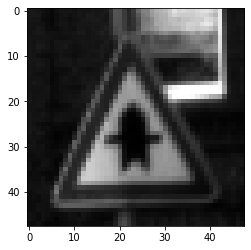

In [ ]:
img = np.random.randint(0, 12660)
plt.imshow(X[img], cmap='gray')
print(classes_dict[y[img]])

In [ ]:
traffic_signs_y['0'].value_counts()

5    2160
4    2100
8    2070
1    1860
0    1410
3    1320
6     780
2     420
9     300
7     240
Name: 0, dtype: int64

Creando conjuntos de entrenamiento y prueba en razon 0.8 y 0.2

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
[X_train.shape, y_train.shape], [X_test.shape, y_test.shape]

([(10128, 48, 48), (10128,)], [(2532, 48, 48), (2532,)])

speed limit 60


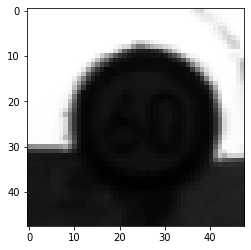

In [ ]:
img = np.random.randint(0, 10128)
plt.imshow(X_train[img], cmap='gray')
print(classes_dict[y_train[img]])

Valores de nuestras imagenes estan entre 0 y 255, normalizamos a valores entre 0 y 1

In [ ]:
X_train[0]

array([[255., 255., 255., ...,  62.,  62.,  62.],
       [255., 255., 255., ...,  63.,  66.,  64.],
       [255., 255., 255., ...,  68.,  70.,  67.],
       ...,
       [254., 255., 254., ..., 252., 252., 253.],
       [254., 255., 254., ..., 253., 253., 253.],
       [254., 255., 253., ..., 252., 253., 252.]])

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

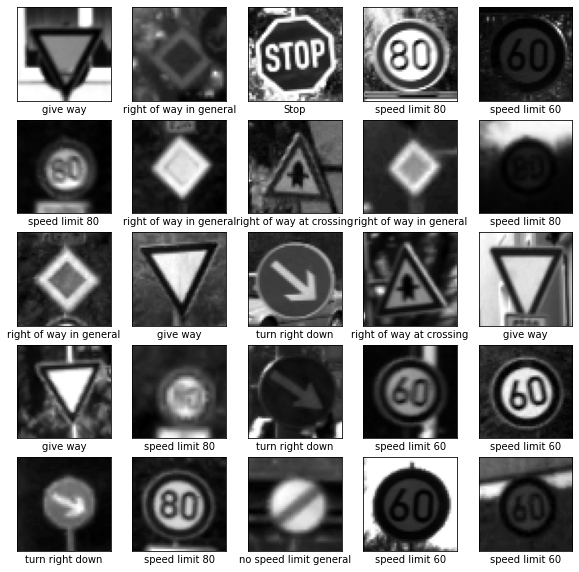

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap='gray')
    plt.xlabel(classes_dict[y_train[i]])
plt.show()

Definir input shape 

In [ ]:
input_shape = (X_train[0].shape[0], X_train[0].shape[1], 1)
input_shape

(48, 48, 1)

## Modelado de red neuronal convolucional

Modelamos nuestra red convolucional, que constara de 3 capas de convolucion de 16, 32 y 32 filtros respectivamente y todas de kernel de 3,3, asi como de capas de pooling de 2,2 

Estas capas se encargaran de la extraccion y resumen de caracteristicas. 

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(16, (3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
Total params: 14,048
Trainable params: 14,048
Non-traina

Agregamos a nuestro modelo las capas densas que se encargaran de la clasificacion de las imagenes previamente convolucionadas. 

In [ ]:
model.add(layers.Flatten())
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(10))

Finalmente tenemos la arquitectura del modelo: 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 23, 23, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 32)          9248      
                                                                 
 flatten (Flatten)           (None, 2048)              0

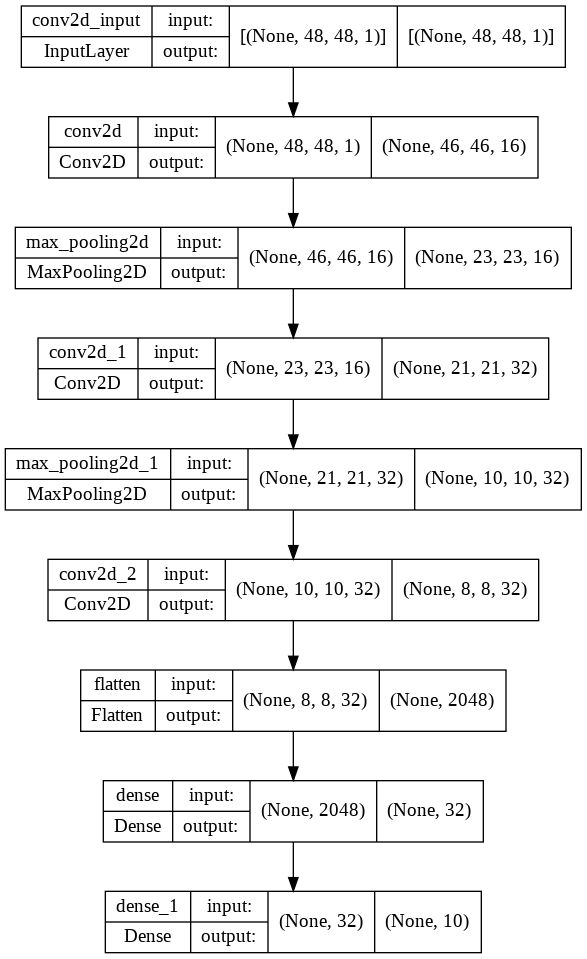

In [ ]:
keras.utils.plot_model(
    model, show_shapes=True, 
    show_layer_names=True)

Compilamos y entrenamos el modelo

In [ ]:
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_test, y_test))

Epoch 1/10
317/317 [==============================] - 21s 61ms/step - loss: 0.6779 - accuracy: 0.7806 - val_loss: 0.2072 - val_accuracy: 0.9333
Epoch 2/10
317/317 [==============================] - 19s 61ms/step - loss: 0.1123 - accuracy: 0.9711 - val_loss: 0.0846 - val_accuracy: 0.9787
Epoch 3/10
317/317 [==============================] - 20s 62ms/step - loss: 0.0534 - accuracy: 0.9855 - val_loss: 0.0531 - val_accuracy: 0.9854
Epoch 4/10
317/317 [==============================] - 19s 61ms/step - loss: 0.0377 - accuracy: 0.9891 - val_loss: 0.0427 - val_accuracy: 0.9862
Epoch 5/10
317/317 [==============================] - 21s 67ms/step - loss: 0.0214 - accuracy: 0.9940 - val_loss: 0.0360 - val_accuracy: 0.9901
Epoch 6/10
317/317 [==============================] - 19s 60ms/step - loss: 0.0152 - accuracy: 0.9955 - val_loss: 0.0277 - val_accuracy: 0.9933
Epoch 7/10
317/317 [==============================] - 19s 61ms/step - loss: 0.0125 - accuracy: 0.9962 - val_loss: 0.0336 - val_accuracy:

Podemos ver el desempeño del modelo a lo largo de las epochs

80/80 - 2s - loss: 0.0271 - accuracy: 0.9945 - 2s/epoch - 25ms/step


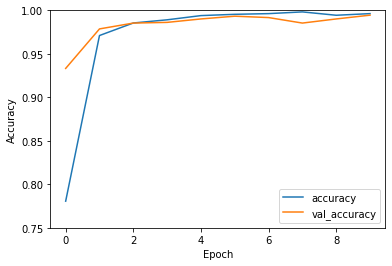

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

## Pruebas de red neuronal contra conjunto de prueba

Evaluamos nuestro conjunto de prueba en nuestra red neuronal entrenada y obtenemos un muy buen rendimiento luego de 10 epochs

In [ ]:
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

print('\nTest accuracy:', test_acc)

80/80 - 1s - loss: 0.0271 - accuracy: 0.9945 - 1s/epoch - 15ms/step

Test accuracy: 0.9944707751274109


In [ ]:
predictions = model.predict(X_test)

Predecimos las clases para todas las primeras 25 imagenes, un mejor rendimiento que la red neuronal artificial. 

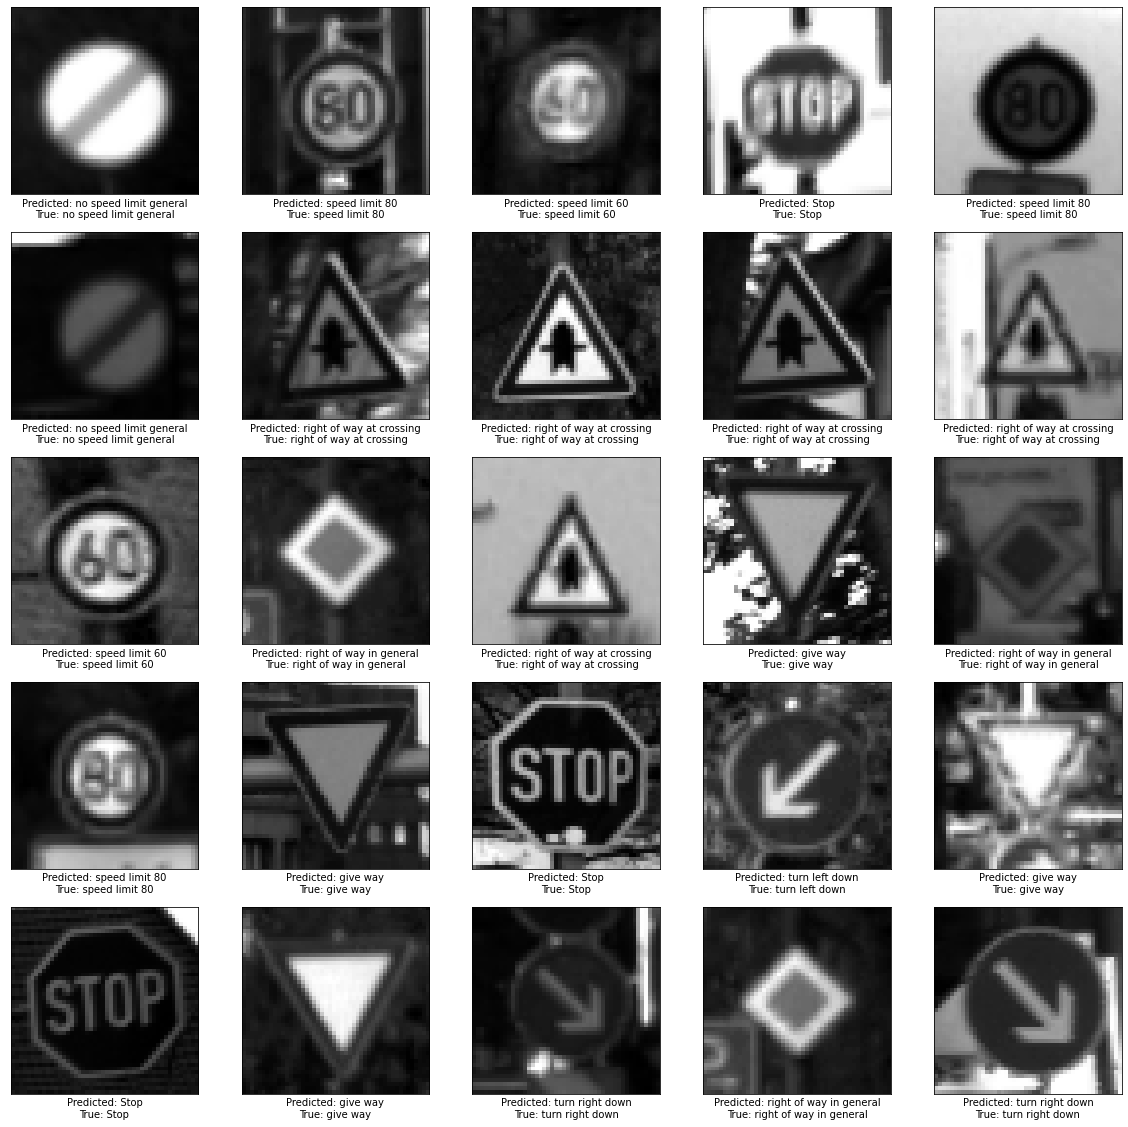

In [ ]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel('Predicted: ' + classes_dict[np.argmax(predictions[i])] + '\nTrue: ' + classes_dict[y_test[i]])
plt.show()

Tanto el valor del accuracy como la prueba practica nos muestran que la red neuronal convolucional logro resolver el problema con gran eficiencia. 

Comparando con la red neuronal artificial, que obtuvo un accuracy de 0.95, la red neuronal convolucional presento un mejor rendimiento tanto teorico como practico, acorde a su facilidad en la clasificacion de imagenes. 

Cabe destacar que a pesar de obtener un gran accuracy, en la practica se debe igualmente cuidar no caer en un overfitting. 